In [3]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

## 8.3 "Doing by talking" II: speech-act theory

### 8.3.1 Speech acts

Speech-act theory has 3 different views of speech: locutionary, illocutionary, and perlocutionary. These correspond to the pure information content of the speech ("the chair is on the way"), the intention of the speaker (to inform you that the chair of the meeting is coming), and the effect on the listener (believing a missing plastic chair is on it's way).

### 8.3.2 Rules of conversation

It has also been observed that humans generally communicate in a cooperative manner, even when they have different interests. Some observed principles are:
1. Quantity - Provide as much information as the other person needs.
2. Quality - Do not say things which are false, only say things you have evidence for.
3. Relation - Say things which are relevant to the conversation.
4. Manner - Be clear and direct. Ovoid obscurity, ambiguity, prolixity, and disorganisation.

In general for two people to communicate in a productive manner they generally need to be following the above 4 rules. For instance, when I say my laptop is out of power I need the other person to tell me where a plug is without lying, talking about something unrelated or irrelevant, or giving me bad directions ("0.1 nautical miles south east"). 

There are exceptions are where the rules conflict with one another. For instance, if you couldn't provide someone with the information they want due to a lack of knowledge you would be violating 1 to preserve 2. Frequently we violate 3 in order to preserve 1 too, for example if you are asking where the milk is for tea, but are in danger of missing an appointment, I might avoid answering your question in order to remind you what the time is. 

Where there is no conflict the violation might just be for strategic reasons. E.g., lying, not disclosing something, distracting.

People also distinguish between the direct meaning of words and the indirect meaning. E.g., "Harry hasn't gone to prison yet" conveys a lot more about Harry's character through implication than through the actual meaning. With nonconventional implicature the meaning comes from the context. The principles are in some way the context as well. "Harry was stupid" implies that the speaker things Harry was stupid, otherwise it would violate 2, and things like "If you speak, I'll run away" really means if-and-only-if, otherwise it would violate 1.

### 8.3.3 A game-theoretic view of speech acts

The above is very flexible, but mathematically ungrounded. To shore it up we might look at theories of belief, desire, and intention (this is covered later), but those are still not complete. Another option is to view it as a game involving two players, a 'speaker' and a 'hearer'. Consider an ambiguous sentence, e.g., from before, "the chair is on the way". Say there is some probability that either the chair of the meeting is coming, or that there is another wooden chair coming. The speaker is aware of the situation, the hearer is not. The speaker chooses a sentence, but pays a cost for being clearer. The sentences are "the chair is on the way", "the chair of this meeting is on the way", and "the wooden chair is on it's way". The listener chooses what to infer. Say there is some cost to the listener infering incorrectly in both cases. It's particularly bad if a wooden chair is coming, but the listener thought they were stuck waiting for the chair of the meeting. This is a signalling game, as before:

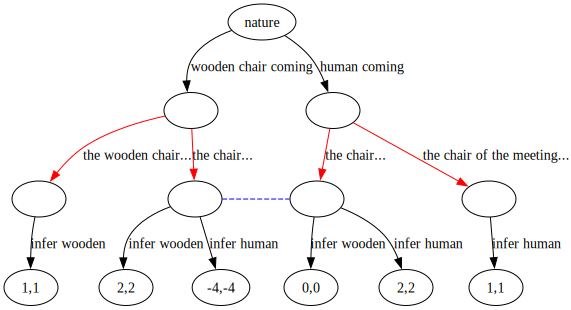

In [24]:
graph1 = Digraph()
graph1.node('root', 'nature')
graph1.node('p1_left', '')
graph1.node('p1_right', '')
graph1.edge('root', 'p1_left', 'wooden chair coming', color="black")
graph1.edge('root', 'p1_right', 'human coming', color="black")
with graph1.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p1_left')
    same_rank.node('p1_right')
graph1.node('p2_left_after_left', '')
graph1.node('p2_right_after_left', '')
graph1.edge('p1_left', 'p2_left_after_left', 'the wooden chair...', color="red")
graph1.edge('p1_left', 'p2_right_after_left', 'the chair...', color="red")
graph1.node('p2_left_after_right', '')
graph1.node('p2_right_after_right', '')
graph1.edge('p1_right', 'p2_left_after_right', 'the chair...', color="red")
graph1.edge('p1_right', 'p2_right_after_right', 'the chair of the meeting...', color="red")
graph1.edge('p2_right_after_left', 'p2_left_after_right', '', color="blue", style="dashed", dir="none")
with graph1.subgraph() as same_rank:
    same_rank.attr(rank='same')
    same_rank.node('p2_right_after_left')
    same_rank.node('p2_right_after_left')
    same_rank.node('p2_left_after_right')
    same_rank.node('p2_right_after_right')
graph1.node('outcome_LL_A', '1,1')
graph1.edge('p2_left_after_left', 'outcome_LL_A', 'infer wooden', color="black")
graph1.node('outcome_LR_A', '2,2')
graph1.node('outcome_LR_B', '-4,-4')
graph1.edge('p2_right_after_left', 'outcome_LR_A', 'infer wooden', color="black")
graph1.edge('p2_right_after_left', 'outcome_LR_B', 'infer human', color="black")
graph1.node('outcome_RL_A', '0,0')
graph1.node('outcome_RL_B', '2,2')
graph1.edge('p2_left_after_right', 'outcome_RL_A', 'infer wooden', color="black")
graph1.edge('p2_left_after_right', 'outcome_RL_B', 'infer human', color="black")
graph1.node('outcome_RR_B', '1,1')
graph1.edge('p2_right_after_right', 'outcome_RR_B', 'infer human', color="black")
display(graph1)

In this game the strategy of the first player is what to say in both cases. The strategy of the second is what to infer when the statement is ambiguous. If we say the utility of both players is the same, given the underlying probability the human chair is missing, we can simplify things down a lot:

In [97]:
# W -> probability the wooden chair is coming
# H -> probability the chair of the meeting is coming (1-W)
# U|W -> the probability of speaking unclearly given the wooden chair is missing
# U|H -> the probability of speaking unclearly given the chair of the meeting is missing
# W|U -> the probability the listener infers a wooden chair is coming given the speaker was unclear
# H|U -> the probability the listener infers the chair of the meeting is coming given the speaker was unclear

def get_utility(p_W, p_U_given_W, p_U_given_H, p_infer_W_given_U):
    p_H = 1-p_W
    p_infer_H_given_U = 1-p_infer_W_given_U
    p_C_given_W = 1-p_U_given_W
    p_C_given_H = 1-p_U_given_H
    value_C_given_W = 1
    value_C_given_H = 1
    value_U_given_W = 2*p_infer_W_given_U -4*p_infer_H_given_U # +2 if right, -4 otherwise
    value_U_given_H = 0*p_infer_W_given_U +2*p_infer_H_given_U # +2 if right, 0 otherwise
    value_given_W = p_U_given_W * value_U_given_W + p_C_given_W * value_C_given_W
    value_given_H = p_U_given_H * value_U_given_H + p_C_given_H * value_C_given_H
    return p_W * value_given_W + (1-p_W) * value_given_H

The above equation is all linear, to it's a straightforward linear programming problem. We know that the optimal answer is at one of the vertexes of that system. Because all the variables here can be in the range 0-1 independently, that means the vertexes are just at the corners of a cube, e.g., (0,1,0). So we can just enumerate them:

In [98]:
def optimal_strategy(p_W):
    best_score = -np.inf
    best_strategy = None
    for p_U_given_W in [0,1]:
        for p_U_given_H in [0,1]:
            for p_infer_W_given_U in [0,1]:
                score = get_utility(p_W, p_U_given_W, p_U_given_H, p_infer_W_given_U)
                if score>best_score:
                    best_score = score
                    best_strategy = [p_U_given_W,p_U_given_H,p_infer_W_given_U]
    return best_score, best_strategy

def report_score(best_score,best_strategy):
    print("utility:",best_score)
    print("strategy:")
    if best_strategy[1]==1:
        print("speak clearly when the wooden chair is missing")
    else:
        print("speak quickly when the wooden chair is missing")
    if best_strategy[2]==1:
        print("speak clearly when the chair of the meeting is missing")
    else:
        print("speak quickly when the chair of the meeting is missing")
    if best_strategy[0]==1:
        print("always infer a wooden chair is missing")
    else:
        print("always infer a the chair of the meeting is missing")

In [99]:
report_score(*optimal_strategy(0.2))

utility: 1.8
strategy:
speak clearly when the wooden chair is missing
speak quickly when the chair of the meeting is missing
always infer a the chair of the meeting is missing


In [100]:
report_score(*optimal_strategy(0.8))

utility: 1.8
strategy:
speak quickly when the wooden chair is missing
speak clearly when the chair of the meeting is missing
always infer a wooden chair is missing


Between player 1 and player 2 they can avoid the negative scores (-4 or 0) by player 1 communicating the nature of the game through their words. If the wooden chair is missing, player 1 will tell player 2. If the chair of the meeting is missing instead, player 1 will shorten the sentence, under the understanding that player 2 will do the correct inference next. The cost of using more words is kept for the less likely option in both cases. This makes a lot of sense! Of course, it gets more complicated if you allow for different utilities. If player 2 stands to lose more from incorrectly believing a wooden chair is coming they may opt to swing the beliefs in that direction. Our language of course has many different equilibria, and arriving at the same one is a challenge.

There are several applications of speech-act theory, some of which are:

1. **TRAINS/TRIPS** - a dialog system to aid navigation. Uses a hierachy of conversation acts.
2. **Workflow systems** - These provide scaffolding in which users' queries fit, e.g., "report", "decline", "acknowledge", ...
3. **Agent communication languages** - These are how comupter agents communicate, e.g., XML.
4. **Rational programming** - This is about moving languages from objects which have information to agents which have motivations. E.g., Elephant2000, which is a language that can make promises. Agent-oriented programming (AOP) is another angle, e.g., Agent0. 